In [1]:
 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        


/kaggle/input/playground-series-s4e10/.DS_Store
/kaggle/input/playground-series-s4e10/test.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv', index_col='id')


In [3]:
train.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [5]:
train.duplicated().sum()

0

In [6]:
test.duplicated().sum()

0

In [7]:
train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
test.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


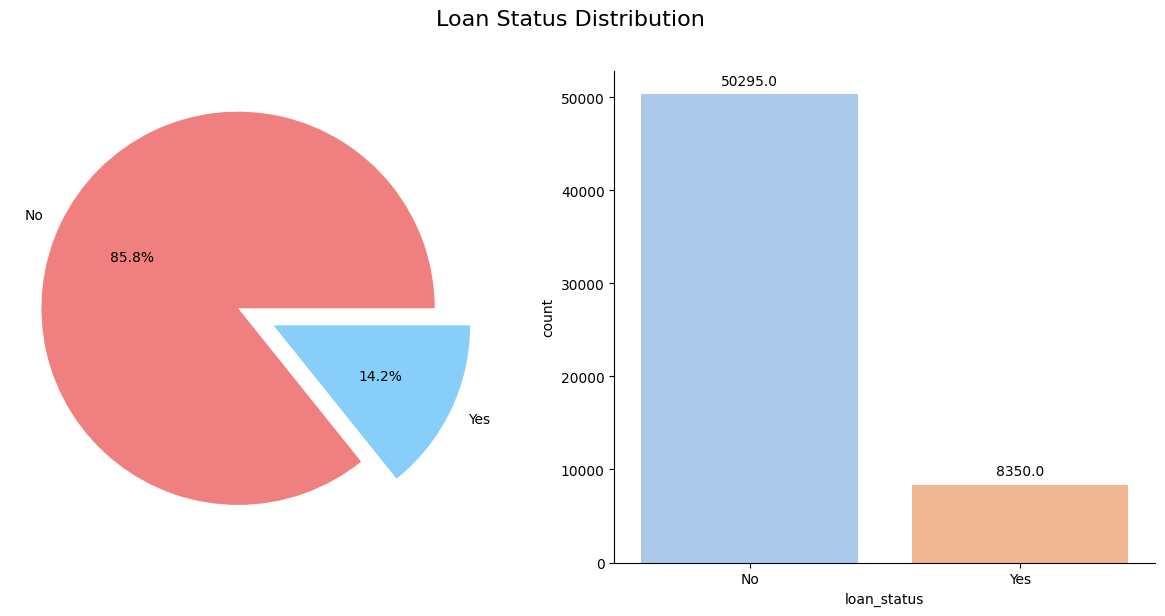

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loan status'u "No" ve "Yes" olarak haritalandır
train["loan_status"] = train["loan_status"].map({0: "No", 1: "Yes"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
loan_counts = train['loan_status'].value_counts()
explode = [0.1] * len(loan_counts)  # loan_counts uzunluğuna göre ayarlanmış explode listesi

# Pie chart
axes[0].pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], explode=explode)

# Count plot
sns.countplot(data=train, x='loan_status', palette='pastel', ax=axes[1])  # 'pastel' palette kullandık

for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.suptitle("Loan Status Distribution", fontsize=16, y=1.02)
sns.despine(right=True, ax=axes[1])

plt.tight_layout()
plt.show()



In [11]:
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>4)]
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [12]:
cat_cols = [col for col in train.columns if (train[col].nunique() <= 8) and (col != 'loan_status')]
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

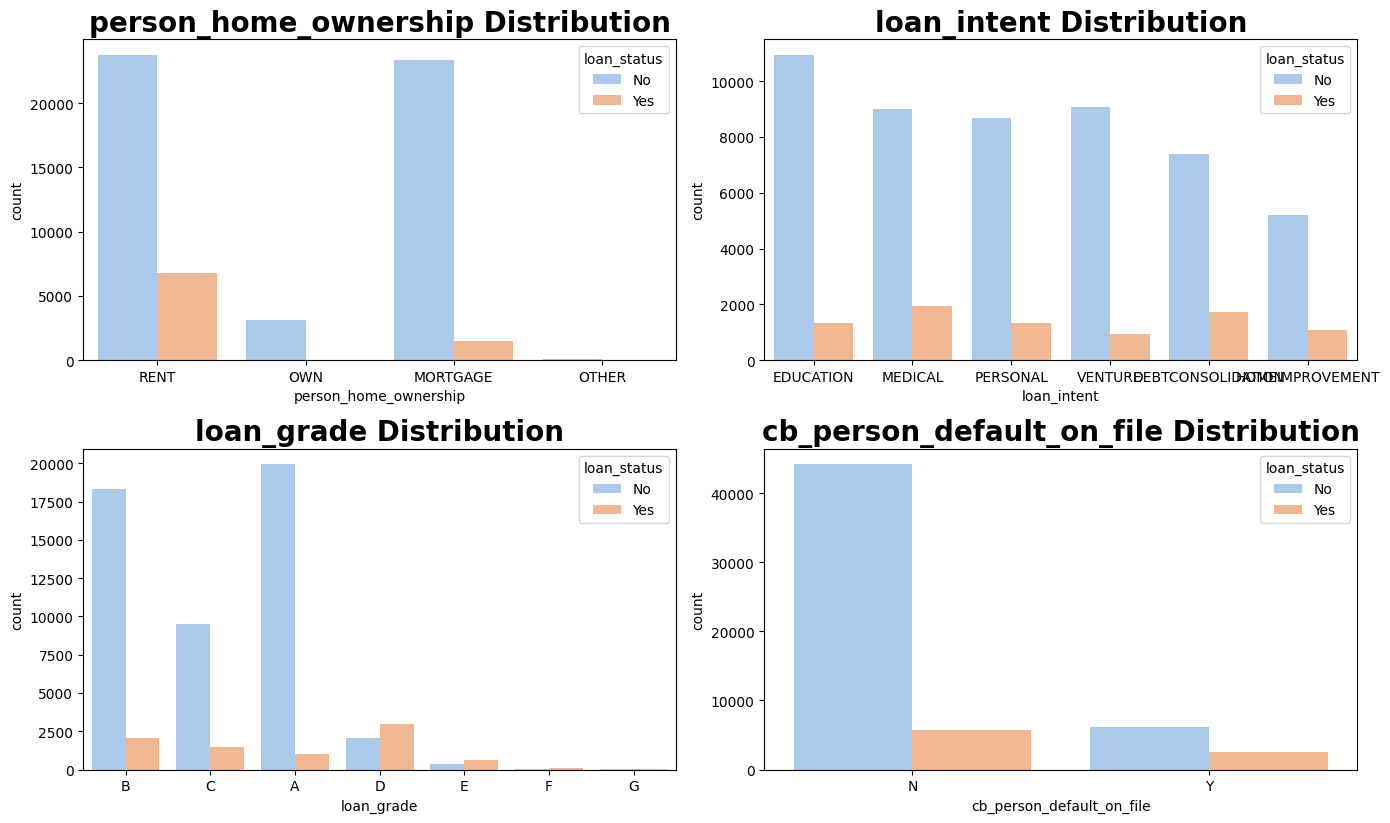

In [13]:
plt.figure(figsize=(14,len(cat_cols)*3))
for idx,column in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.countplot(hue="loan_status", x=column, data=train, palette="pastel")
    plt.title(f"{column} Distribution",weight='bold',fontsize=20)
    plt.tight_layout()

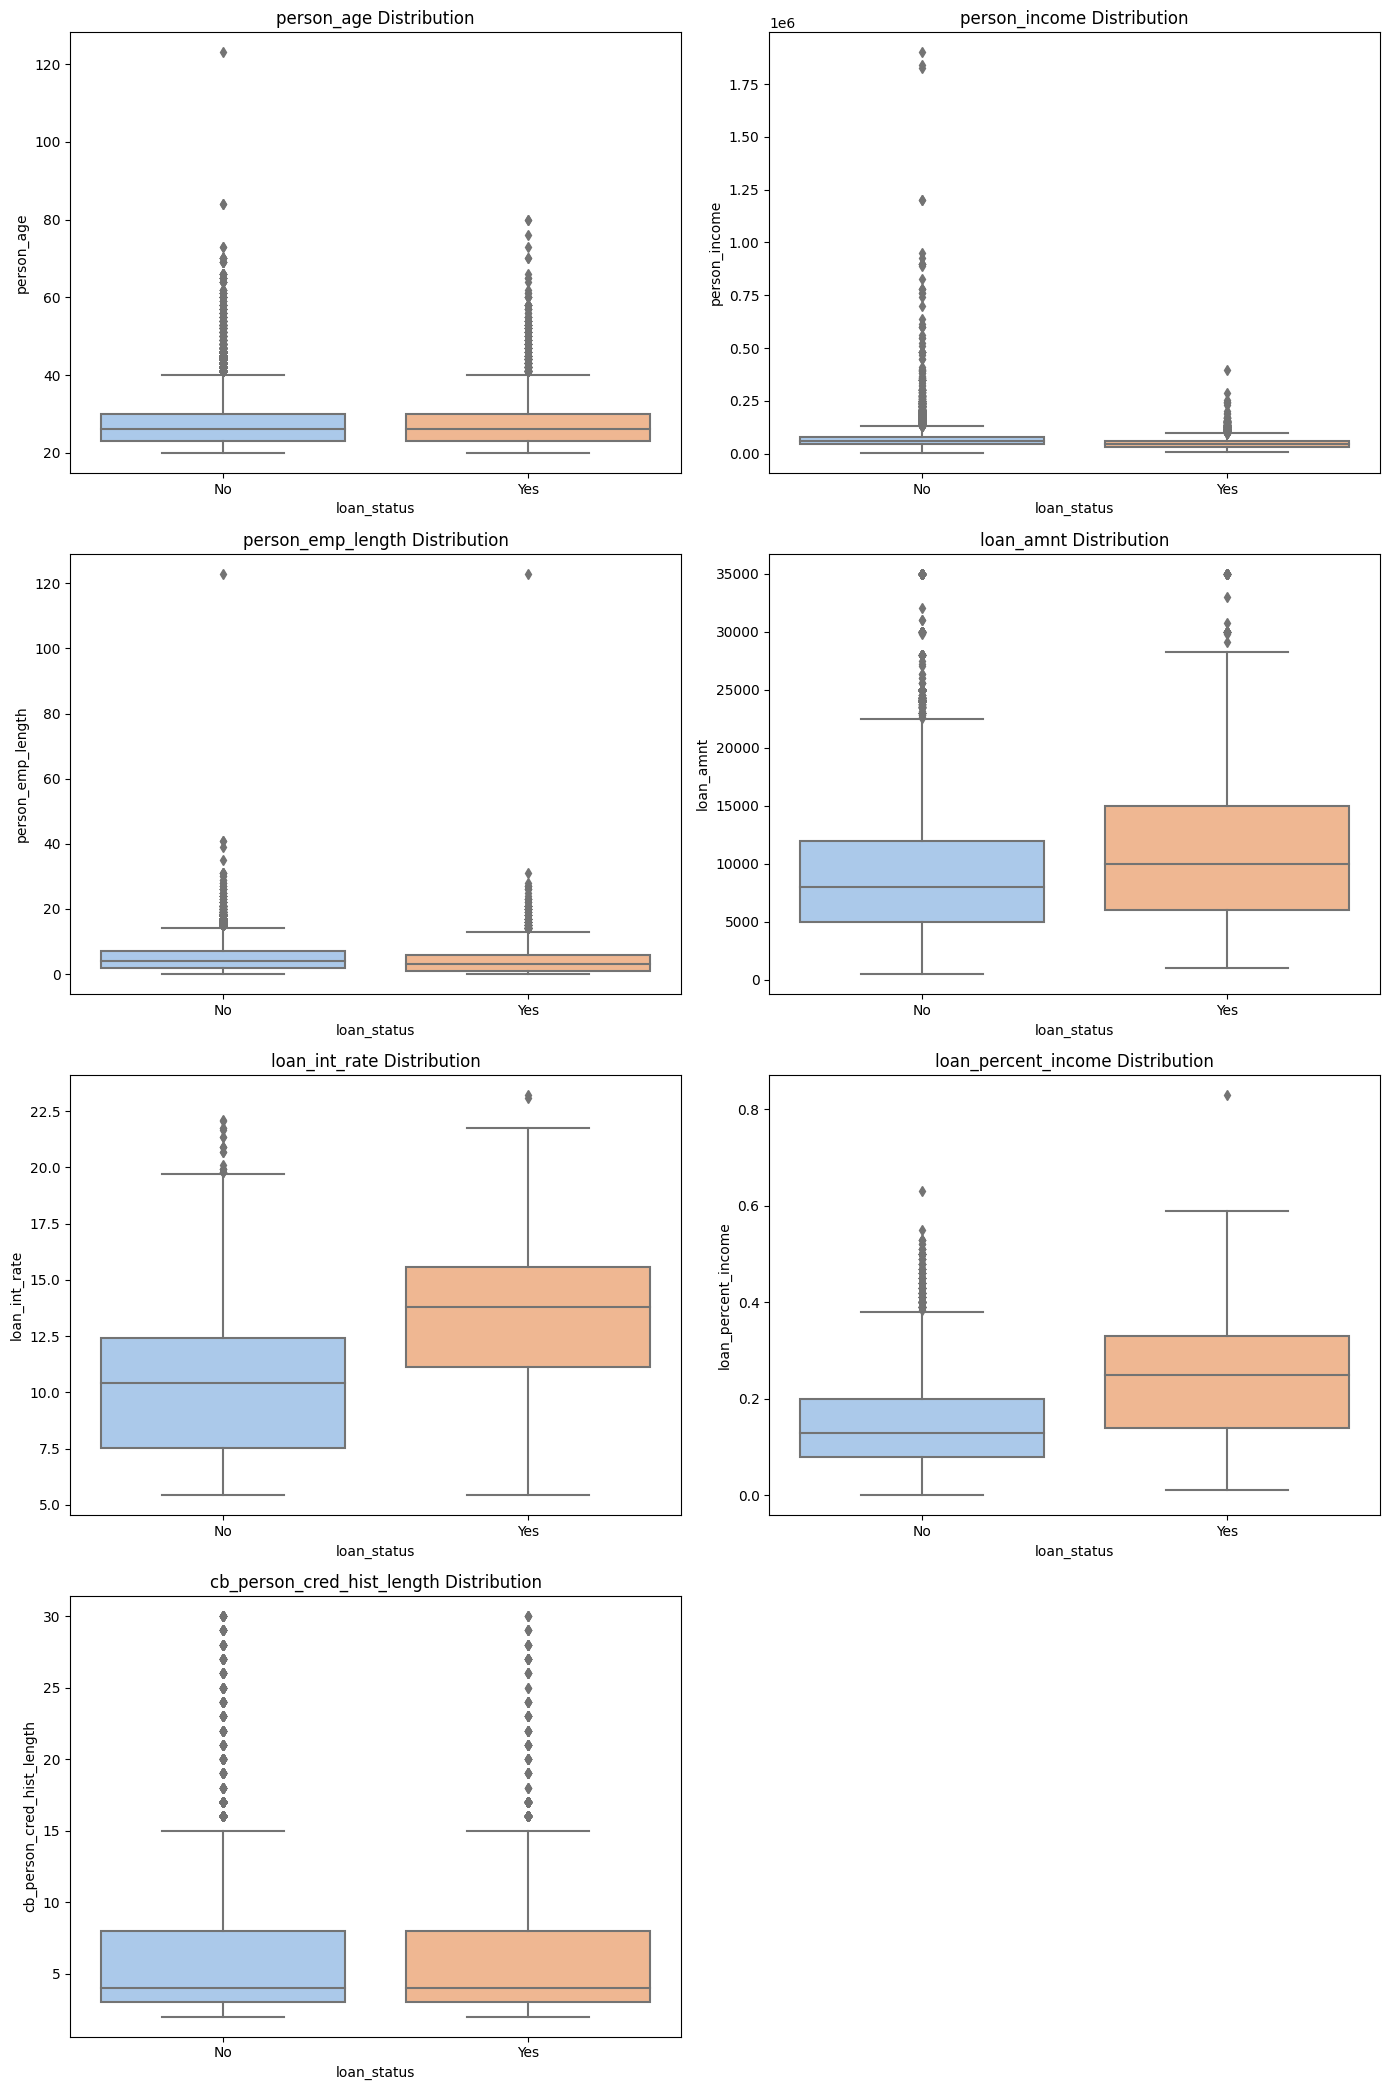

In [14]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="loan_status", y=column, data=train,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

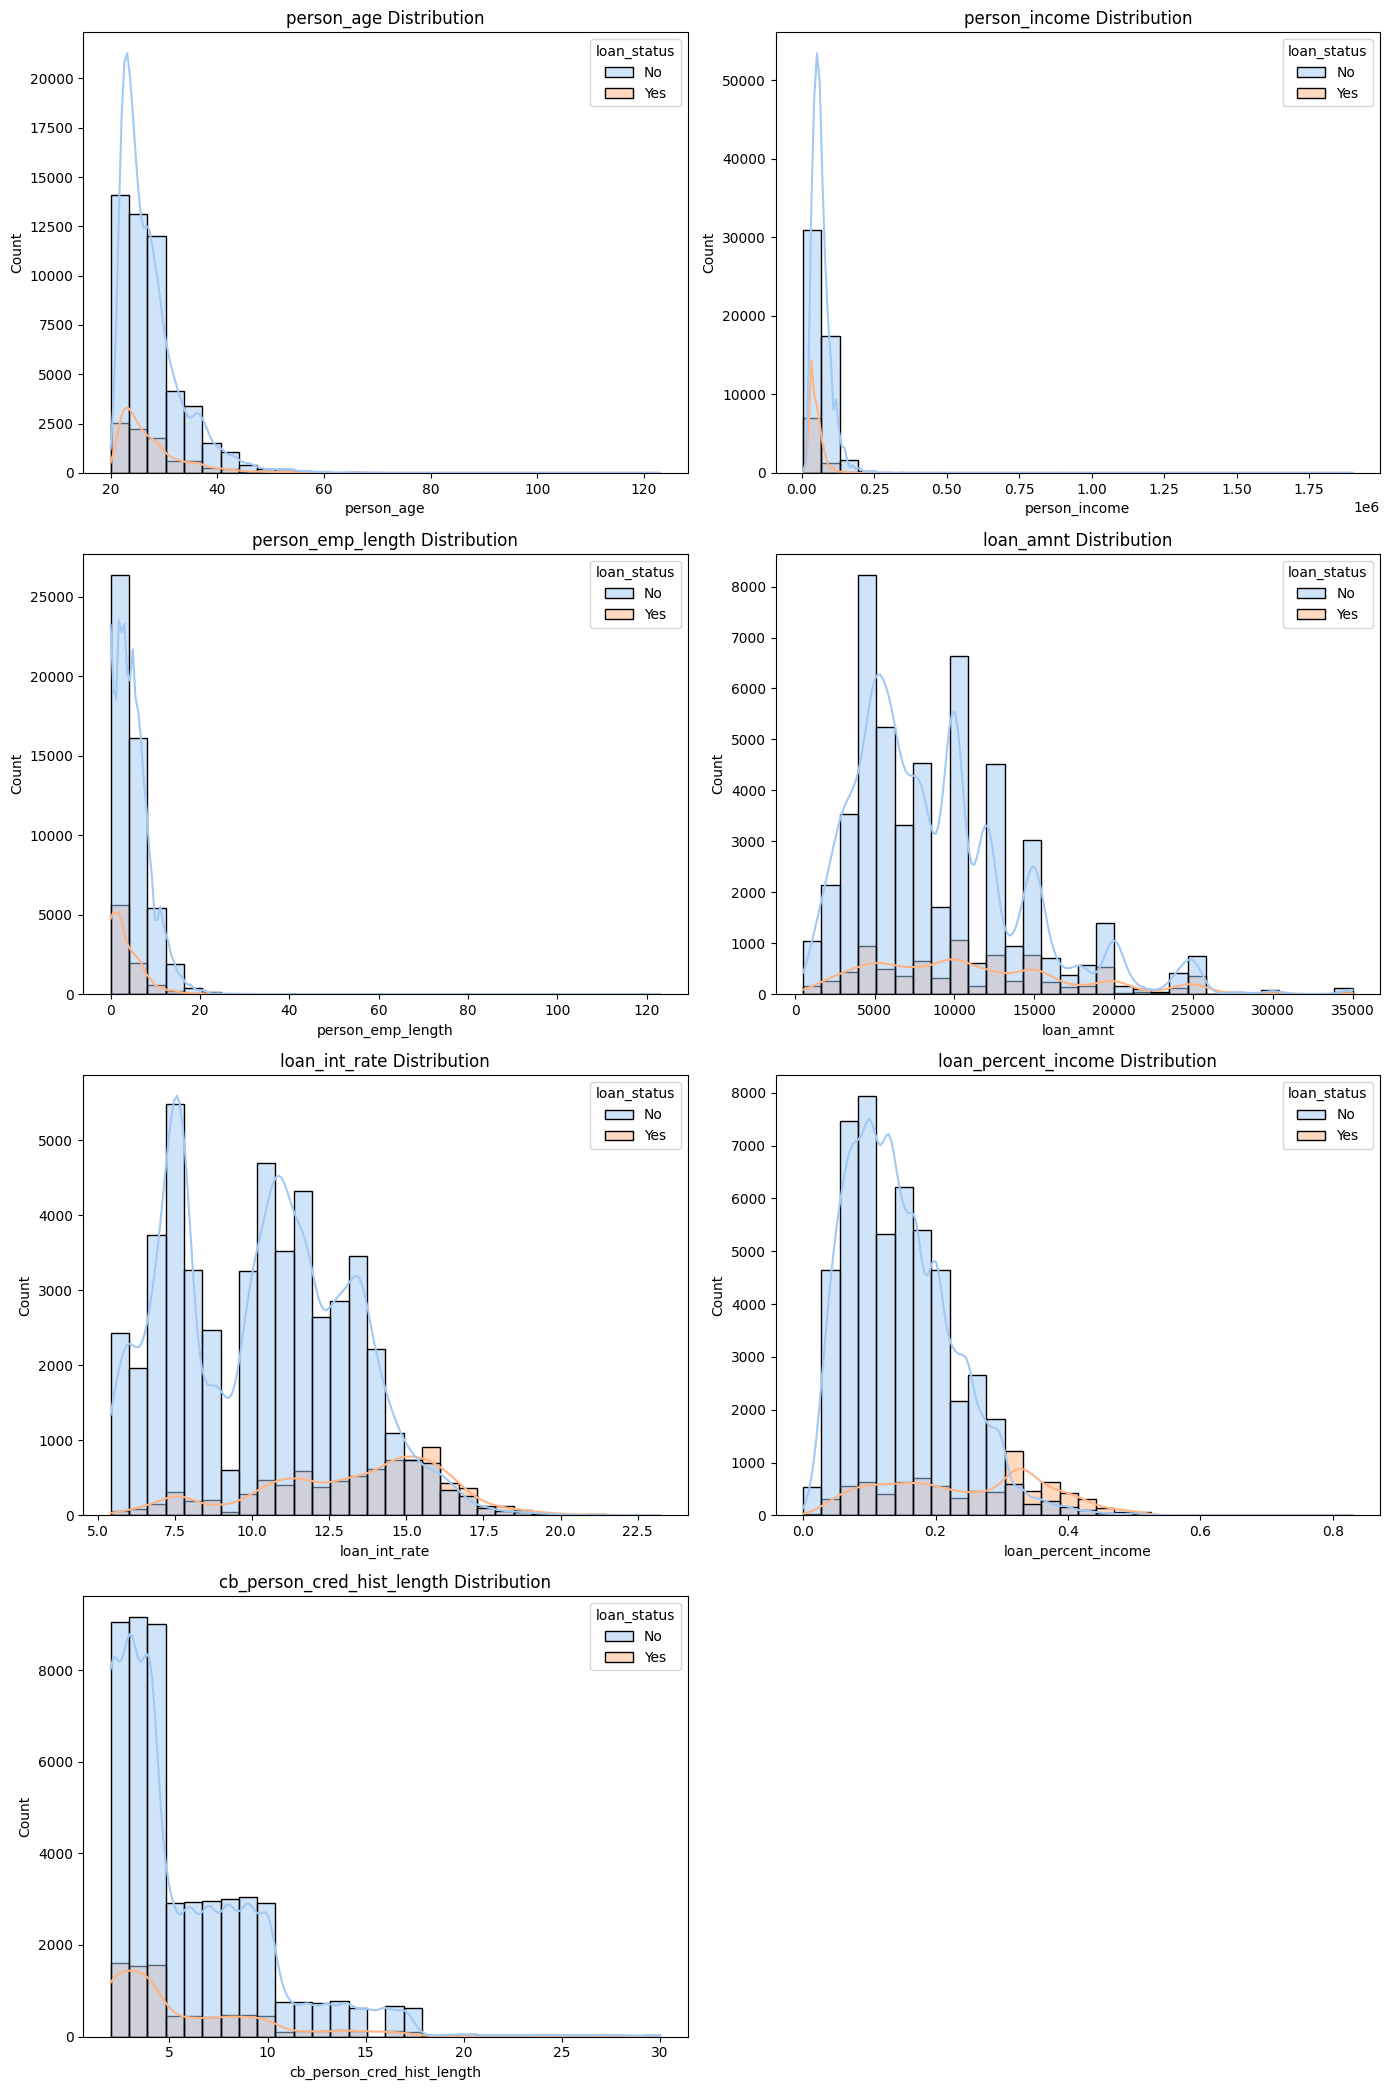

In [15]:
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="loan_status", data=train,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [16]:
train["loan_status"]=train["loan_status"].map({"No": 0,"Yes": 1})

In [17]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [18]:
train[num_cols] = train[num_cols].astype(float)

In [19]:
for col in num_cols:
    try:
        print(col, check_outlier(train, col))  
        if check_outlier(train, col):
            replace_with_thresholds(train, col) 
    except Exception as e:
        print(f"Hata oluştu: {e} - Sütun: {col}")

person_age True
person_income True
person_emp_length True
loan_amnt False
loan_int_rate False
loan_percent_income True
cb_person_cred_hist_length False


In [20]:
for col in num_cols:
    print(col, check_outlier(train, num_cols))

person_age False
person_income False
person_emp_length False
loan_amnt False
loan_int_rate False
loan_percent_income False
cb_person_cred_hist_length False


In [21]:

print(train.dtypes)

person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
loan_status                     int64
dtype: object


In [22]:
train = pd.get_dummies(train, columns=cat_cols, drop_first = True)
test = pd.get_dummies(test, columns=cat_cols, drop_first = True)

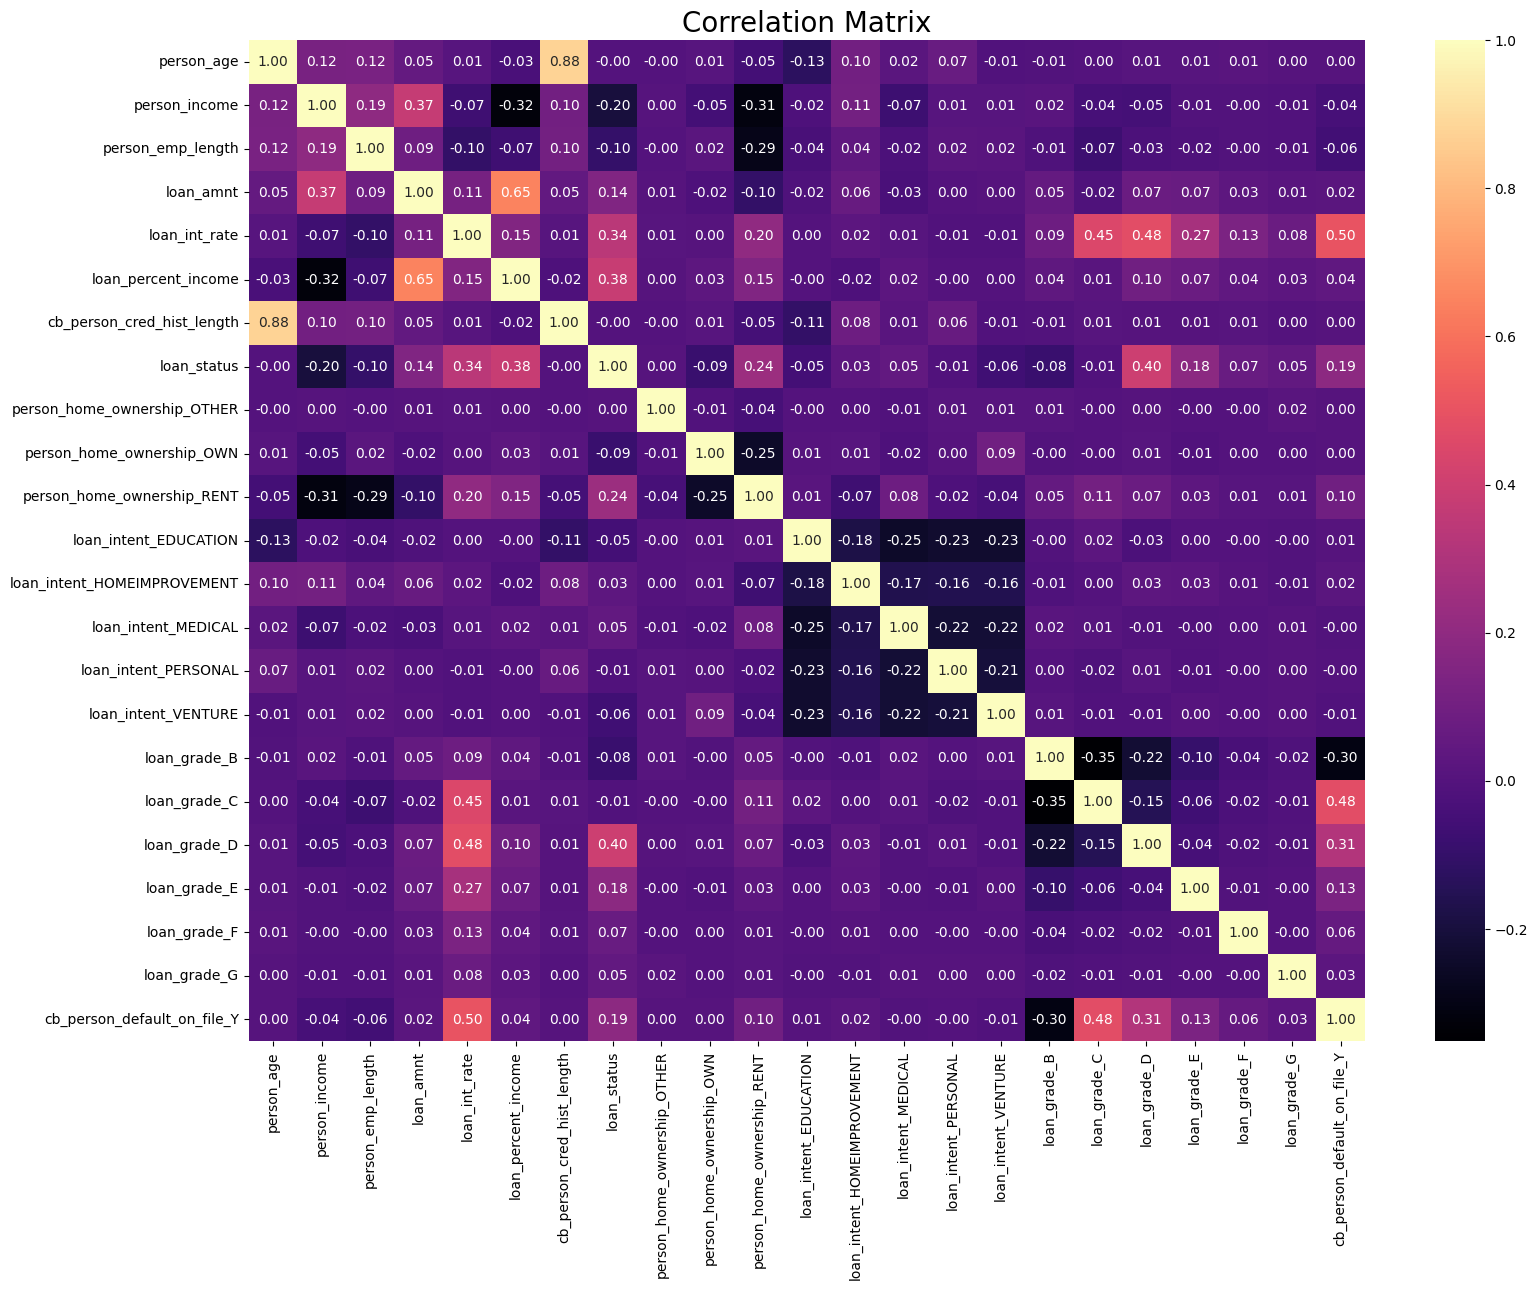

In [23]:
train.corr()


f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(train.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X = train.drop("loan_status", axis=1)
y = train["loan_status"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 101)

[LightGBM] [Info] Number of positive: 7536, number of negative: 45244
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 52780, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142781 -> initscore=-1.792379
[LightGBM] [Info] Start training from score -1.792379


0.9540218031605876

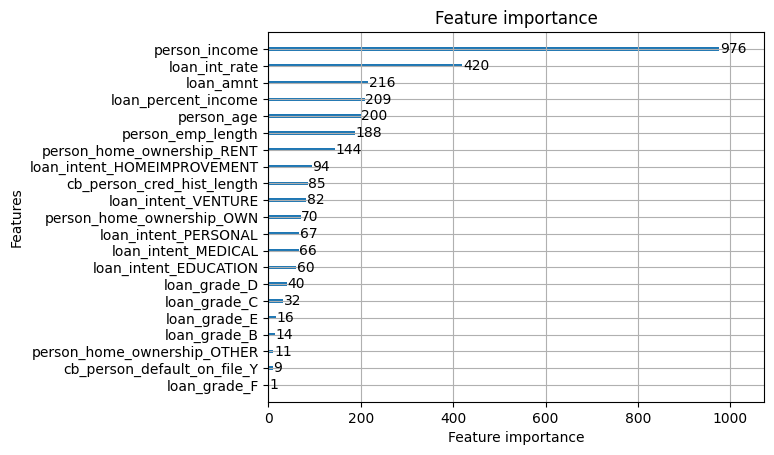

In [25]:
import lightgbm
lgb = lightgbm.LGBMClassifier(metric = "auc")
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
roc_auc_score(y_test,lgb.predict_proba(X_test)[:,1])

In [26]:
def feature_engineering(df):
    
    def categorize_age(age):
        if age < 30:
            return "Young"
        elif age < 60:
            return "Middle age"
        else:
            return "Old"
    
    df['age_group'] = df['person_age'].apply(categorize_age)
    
    # age_income_ratio: Yaşa göre gelir oranı
    df['age_income_ratio'] = df['person_income'] / (df['person_age'] + 1e-9)
    
    # loan_income_ratio: Kredi tutarının gelire oranı
    df['loan_income_ratio'] = df['loan_amnt'] / (df['person_income'] + 1e-9)
    
    # is_long_term_employed: Uzun süreli çalışanlar için bir bayrak değişkeni
    df['is_long_term_employed'] = df['person_emp_length'].apply(lambda x: 1 if x >= 5 else 0)
    
    return df


train = feature_engineering(train)
test = feature_engineering(test)




In [27]:
train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,age_group,age_income_ratio,loan_income_ratio,is_long_term_employed
id,,,,,,,,,,,,,,,,,,,,,
0,37.0,35000.0,0.0,6000.0,11.49,0.17,14.0,0,False,False,...,False,False,False,False,False,False,Middle age,945.945946,0.171429,0
1,22.0,56000.0,6.0,4000.0,13.35,0.07,2.0,0,False,True,...,True,False,False,False,False,False,Young,2545.454545,0.071429,1
2,29.0,28800.0,8.0,6000.0,8.90,0.21,10.0,0,False,True,...,False,False,False,False,False,False,Young,993.103448,0.208333,1
3,30.0,70000.0,14.0,12000.0,11.11,0.17,5.0,0,False,False,...,False,False,False,False,False,False,Middle age,2333.333333,0.171429,1
4,22.0,60000.0,2.0,6000.0,6.92,0.10,3.0,0,False,False,...,False,False,False,False,False,False,Young,2727.272727,0.100000,0


In [28]:
train = pd.get_dummies(train, columns=['age_group'], drop_first=True)
test = pd.get_dummies(test, columns=['age_group'], drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X = train.drop("loan_status", axis=1)
y = train["loan_status"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 101)

[LightGBM] [Info] Number of positive: 7536, number of negative: 45244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 52780, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142781 -> initscore=-1.792379
[LightGBM] [Info] Start training from score -1.792379


0.9543713094495117

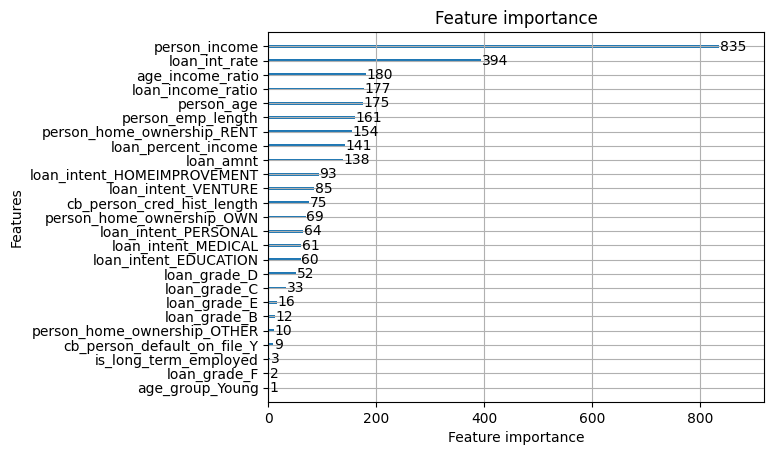

In [30]:
import lightgbm
lgb = lightgbm.LGBMClassifier(metric = "auc")
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
roc_auc_score(y_test,lgb.predict_proba(X_test)[:,1])

In [31]:
from lightgbm import LGBMClassifier

def objective_lgb(trial):
    
    lgb_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),

    }

    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc

In [32]:
study_lgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=20,show_progress_bar=True)

[I 2024-11-11 09:49:19,550] A new study created in memory with name: no-name-73eca265-d448-4bf9-91b7-31b5a8a0cb06


  0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7536, number of negative: 45244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 52780, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142781 -> initscore=-1.792379
[LightGBM] [Info] Start training from score -1.792379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [33]:
print('Best parameters', study_lgb.best_params)

Best parameters {'learning_rate': 0.03034371348023937, 'max_depth': 6, 'n_estimators': 908, 'colsample_bytree': 0.5215039712128353}


In [34]:
lgbm_final = LGBMClassifier(**study_lgb.best_params)
lgbm_final.fit(X_train, y_train)
y_pred = lgbm_final.predict_proba(X_test)[:,1]

print('Accuracy: ', roc_auc_score(y_test, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7536, number of negative: 45244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 52780, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142781 -> initscore=-1.792379
[LightGBM] [Info] Start training from score -1.792379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [35]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
sub["loan_status"]=lgbm_final.predict_proba(test)[:, 1]
sub.to_csv('/kaggle/output/submission.csv',index=False)
sub

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,id,loan_status
0,58645,0.997193
1,58646,0.008309
2,58647,0.677977
3,58648,0.007278
4,58649,0.165364
...,...,...
39093,97738,0.049317
39094,97739,0.004001
39095,97740,0.008352
39096,97741,0.320291
